**Data Crawling Assesment from TM&RD**. 

###### Web Crawling is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets

#### Import the required package

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import time 


In [0]:
titleList = []
priceList = []
areaList = []
typesList = []
sizeList = []
bedroomList = []
datesList =[]
timesStampList = []

### For this assesment I'm crawling only the few pages of the web pages since. 

#### To scrape more we could increase the while loop to scrape more than 100 pages etc. 

In [3]:
i = 1

url = "https://www.mudah.my/Selangor/Apartments-for-sale-2020?lst=" +str(i)+ "&fs=1&w=108&cg=2020&so=1&st=s"


while i<=15:
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    
    title = soup.find_all('h2', {'class':'list_title'})
    price = soup.find_all('div', {'class':'ads_price'})
    area = soup.find_all('div', {'class':'area'})
    types = soup.find_all('div', {'class':'apartments'})
    size = soup.find_all('div', {'class':'apartmentAndLandAndRoomsAndNew-Properties-size'})
    bedroom = soup.find_all('div', {'class':'bedroom'})
    dates = soup.find_all('div', {'class':'location bottom_info'})
    timesstamp = soup.findAll('div', {'class':'_timestamp'})

    timesstamp = [k.text for k in timesstamp]
    timesstamp = timesstamp[:-1]
    
    title = [k.text for k in title]
    title = title[:-1]
    
    price = [k.text for k in price]
    price = price[:-1]
    
    area = [k.text for k in area]
    area = area[:-1]
    
    types = [k.text for k in types]
    types = types[:-1]
    
    size = [k.text for k in size]
    size = size[:-1]
    
    bedroom = [k.text for k in bedroom]
    bedroom = bedroom[:-1]
    
    dates = [k.text for k in dates]
    dates = dates[:-1]
    
    titleList += title
    priceList += price
    areaList += area
    typesList += types
    sizeList += size
    bedroomList += bedroom
    datesList += dates
    
    print("number of pages that been scraped : ", i)
    i = i+1


number of pages that been scraped :  1
number of pages that been scraped :  2
number of pages that been scraped :  3
number of pages that been scraped :  4
number of pages that been scraped :  5
number of pages that been scraped :  6
number of pages that been scraped :  7
number of pages that been scraped :  8
number of pages that been scraped :  9
number of pages that been scraped :  10
number of pages that been scraped :  11
number of pages that been scraped :  12
number of pages that been scraped :  13
number of pages that been scraped :  14
number of pages that been scraped :  15


In [4]:
df_title = pd.DataFrame()
df_price = pd.DataFrame()
df_area = pd.DataFrame()
df_types = pd.DataFrame()
df_size = pd.DataFrame()
df_bedroom = pd.DataFrame()
df_dates = pd.DataFrame()

print(len(titleList))
print(len(priceList))
print(len(areaList))
print(len(typesList))
print(len(sizeList))
print(len(bedroom))
print(len(datesList))


df_dates['Date'] = datesList
df_area['Area'] = areaList
df_title['Title'] = titleList
df_types['Type'] = typesList
df_bedroom['Bedroom'] = bedroomList
df_size['Size'] = sizeList
df_price['Price'] = priceList

600
600
585
630
630
42
600


In [5]:
df_apartements = pd.concat([df_dates, df_area, df_title,df_types, df_bedroom, df_size, df_price ], axis=1)
df_apartements.head(10)

,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today, 01:55 Sepang",Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,RM 120 000
1,"Today, 01:45 Sepang",Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
2,"Today, 01:45 Petaling Jaya",Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,RM 509 999
3,"Today, 01:40 Cyberjaya",Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
4,"Today, 01:05 Petaling Jaya",Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,RM 498 000
5,"Today, 01:05 Petaling Jaya",Petaling Jaya,"First Home Buyer , Free MOT , 100% Loan + Fr...",Apartments,3 Bedrooms,850 sq.ft,RM 570 000
6,"Today, 00:41 Bandar Sunway",Bandar Sunway,"Bandar sunway, sri subang apartment, tingkat...",Apartments,3 Bedrooms,785 sq.ft,RM 220 000
7,"Today, 00:41 Puchong",Puchong,"KENANGA APARTMENT,TAMAN PUTRA PERDANA,ground...",Apartments,3 Bedrooms,800 sq.ft,RM 205 000
8,"Today, 00:16 Bangi",Bangi,Dual entrance freehold bumi apt miro tmn put...,Apartments,4 Bedrooms,1200 sq.ft,RM 299 000
9,"Today, 00:07 USJ",USJ,Da men residence usj 1 subang jaya,Apartments,2 Bedrooms,1013 sq.ft,RM 650 000


In [6]:
df_apartements.isnull().sum()


Date       30
Area       45
Title      30
Type        0
Bedroom     0
Size        0
Price      30
dtype: int64

In [7]:
df_apartements.dropna(inplace= True)
df_apartements.shape

(585, 7)

In [8]:
df_apartements

,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today, 01:55 Sepang",Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,RM 120 000
1,"Today, 01:45 Sepang",Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
2,"Today, 01:45 Petaling Jaya",Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,RM 509 999
3,"Today, 01:40 Cyberjaya",Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
4,"Today, 01:05 Petaling Jaya",Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,RM 498 000
...,...,...,...,...,...,...,...
580,"Yesterday, 21:45 Shah Alam",Shah Alam,"Apartment Desa Subang, Jalan Waruna, Seksyen...",Apartments,3 Bedrooms,603 sq.ft,RM 190 000
581,"Yesterday, 21:45 Shah Alam",Shah Alam,"Apartment Service Menara U2, Seksyen 13, Sha...",Apartments,2 Bedrooms,516 sq.ft,RM 261 000
582,"Yesterday, 21:42 Semenyih",Seri Kembangan,[FREEHOLD] New D'Cassia Apartment Ecohill Se...,Apartments,2 Bedrooms,800 sq.ft,RM 265 000
583,"Yesterday, 21:40 Kajang",Shah Alam,"Flat Jalan Kajang Perdana 2, Kajang Perdana,...",Apartments,3 Bedrooms,811 sq.ft,RM 120 000


In [0]:
#df_apartements.to_csv('datasets/exportDataFrames.csv', index=False, header=True)

In [10]:
df_apartements.isnull().sum()


Date       0
Area       0
Title      0
Type       0
Bedroom    0
Size       0
Price      0
dtype: int64

In [11]:
df_apartements.isna().sum()


Date       0
Area       0
Title      0
Type       0
Bedroom    0
Size       0
Price      0
dtype: int64

In [12]:
df_apartements.isna().any()


Date       False
Area       False
Title      False
Type       False
Bedroom    False
Size       False
Price      False
dtype: bool

In [13]:
df_apartements.isna().any(axis = None)

False

In [14]:
df_apartements['Date'][1:]

1                    Today, 01:45   Sepang   
2             Today, 01:45   Petaling Jaya   
3                 Today, 01:40   Cyberjaya   
4             Today, 01:05   Petaling Jaya   
5             Today, 01:05   Petaling Jaya   
                        ...                  
580           Yesterday, 21:45   Shah Alam   
581           Yesterday, 21:45   Shah Alam   
582            Yesterday, 21:42   Semenyih   
583              Yesterday, 21:40   Kajang   
584      Yesterday, 21:40   Seri Kembangan   
Name: Date, Length: 584, dtype: object

In [15]:
df_apartements["Date"] = df_apartements["Date"].str.split(n = 1).str[0]
#df_apartements["dates"] = df_apartements["Date"].str.split(n = 1).str[1]
df_apartements


,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today,",Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,RM 120 000
1,"Today,",Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
2,"Today,",Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,RM 509 999
3,"Today,",Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
4,"Today,",Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,RM 498 000
...,...,...,...,...,...,...,...
580,"Yesterday,",Shah Alam,"Apartment Desa Subang, Jalan Waruna, Seksyen...",Apartments,3 Bedrooms,603 sq.ft,RM 190 000
581,"Yesterday,",Shah Alam,"Apartment Service Menara U2, Seksyen 13, Sha...",Apartments,2 Bedrooms,516 sq.ft,RM 261 000
582,"Yesterday,",Seri Kembangan,[FREEHOLD] New D'Cassia Apartment Ecohill Se...,Apartments,2 Bedrooms,800 sq.ft,RM 265 000
583,"Yesterday,",Shah Alam,"Flat Jalan Kajang Perdana 2, Kajang Perdana,...",Apartments,3 Bedrooms,811 sq.ft,RM 120 000


In [0]:
df_apartements['Date'] = df_apartements['Date'].str.replace(',', '')


In [72]:
df_apartements

,Date,Area,Title,Type,Bedroom,Size,Price
0,Today,Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,RM 120 000
1,Today,Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
2,Today,Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,RM 509 999
3,Today,Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
4,Today,Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,RM 498 000
...,...,...,...,...,...,...,...
580,Yesterday,Shah Alam,"Apartment Desa Subang, Jalan Waruna, Seksyen...",Apartments,3 Bedrooms,603 sq.ft,RM 190 000
581,Yesterday,Shah Alam,"Apartment Service Menara U2, Seksyen 13, Sha...",Apartments,2 Bedrooms,516 sq.ft,RM 261 000
582,Yesterday,Seri Kembangan,[FREEHOLD] New D'Cassia Apartment Ecohill Se...,Apartments,2 Bedrooms,800 sq.ft,RM 265 000
583,Yesterday,Shah Alam,"Flat Jalan Kajang Perdana 2, Kajang Perdana,...",Apartments,3 Bedrooms,811 sq.ft,RM 120 000


In [0]:
#del df_apartements['date']

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!ls

drive  sample_data


In [23]:
cd /content/drive/My Drive/web-scrapping

/content/drive/My Drive/web-scrapping


In [24]:
!ls

exportDataFrames.csv  exportDataFrames.gsheet  exportDatasets.csv


In [0]:
df_apartements.to_csv('/content/drive/My Drive/web-scrapping/exportDataset.csv', index=False, header=True)

In [26]:
df_apartements.dropna(inplace= True)
df_apartements.shape

(585, 7)

In [27]:
df_apartements


,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today,",Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,RM 120 000
1,"Today,",Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
2,"Today,",Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,RM 509 999
3,"Today,",Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,RM 238 000
4,"Today,",Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,RM 498 000
...,...,...,...,...,...,...,...
580,"Yesterday,",Shah Alam,"Apartment Desa Subang, Jalan Waruna, Seksyen...",Apartments,3 Bedrooms,603 sq.ft,RM 190 000
581,"Yesterday,",Shah Alam,"Apartment Service Menara U2, Seksyen 13, Sha...",Apartments,2 Bedrooms,516 sq.ft,RM 261 000
582,"Yesterday,",Seri Kembangan,[FREEHOLD] New D'Cassia Apartment Ecohill Se...,Apartments,2 Bedrooms,800 sq.ft,RM 265 000
583,"Yesterday,",Shah Alam,"Flat Jalan Kajang Perdana 2, Kajang Perdana,...",Apartments,3 Bedrooms,811 sq.ft,RM 120 000


In [28]:
df_apartements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 584
Data columns (total 7 columns):
Date       585 non-null object
Area       585 non-null object
Title      585 non-null object
Type       585 non-null object
Bedroom    585 non-null object
Size       585 non-null object
Price      585 non-null object
dtypes: object(7)
memory usage: 36.6+ KB


In [0]:
from datetime import datetime


In [0]:
# df_apartements['Date'] =  pd.to_datetime(df_apartements['Date'],
#                               format='')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
cleaned_df = df_apartements[~df_apartements['Title'].str.contains(' naza ', case=False)]
cleaned_df.shape

(585, 7)

In [56]:
cleaned_df['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'])

cleaned_df

,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today,",Sepang,"Flat dahlia, taman dahlia, bandar baru salak...",Apartments,3 Bedrooms,651 sq.ft,120000
1,"Today,",Sepang,Sepang Best Selling Condo Near KLIA! Call Me!,Apartments,3 Bedrooms,660 sq.ft,238000
2,"Today,",Petaling Jaya,Paradesa Rustica Condominium,Apartments,3 Bedrooms,1045 sq.ft,509999
3,"Today,",Cyberjaya,Best Investment at Cybersouth! Hot Selling !...,Apartments,3 Bedrooms,660 sq.ft,238000
4,"Today,",Petaling Jaya,"100% Loan , Free MOT , 1km to Jaya33 , Unive...",Apartments,2 Bedrooms,750 sq.ft,498000
...,...,...,...,...,...,...,...
580,"Yesterday,",Shah Alam,"Apartment Desa Subang, Jalan Waruna, Seksyen...",Apartments,3 Bedrooms,603 sq.ft,190000
581,"Yesterday,",Shah Alam,"Apartment Service Menara U2, Seksyen 13, Sha...",Apartments,2 Bedrooms,516 sq.ft,261000
582,"Yesterday,",Seri Kembangan,[FREEHOLD] New D'Cassia Apartment Ecohill Se...,Apartments,2 Bedrooms,800 sq.ft,265000
583,"Yesterday,",Shah Alam,"Flat Jalan Kajang Perdana 2, Kajang Perdana,...",Apartments,3 Bedrooms,811 sq.ft,120000


In [57]:
location_group = cleaned_df.groupby(['Area'])['Title'].count().reset_index()

location_average = cleaned_df.groupby(['Area'])['Price'].mean().reset_index()


display(location_group, round(location_average, 2))

,Area,Title
0,Ampang,15
1,Bandar Sunway,15
2,Bangi,15
3,Bukit Jelutong,15
4,Cyberjaya,30
5,Kajang,75
6,Kota Damansara,15
7,Petaling Jaya,60
8,Puchong,15
9,Rawang,30


,Area,Price
0,Ampang,216846.67
1,Bandar Sunway,296599.93
2,Bangi,314599.93
3,Bukit Jelutong,234713.33
4,Cyberjaya,250223.30
5,Kajang,316329.29
6,Kota Damansara,352666.60
7,Petaling Jaya,262639.95
8,Puchong,301866.60
9,Rawang,281533.33


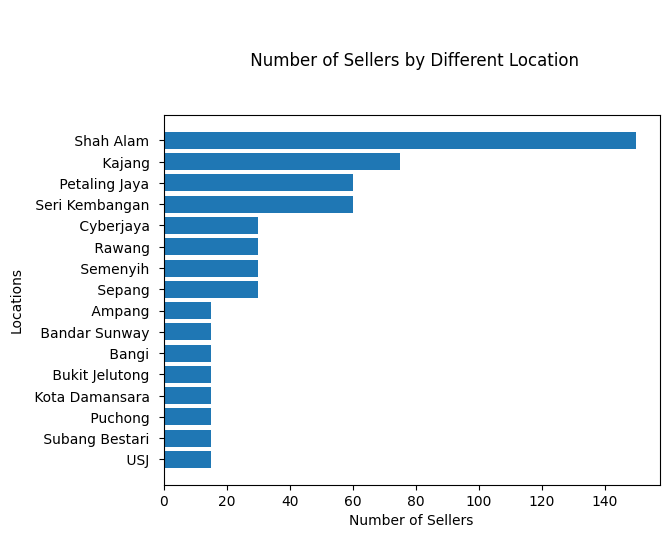

In [68]:
location_group = location_group.sort_values('Title', ascending=False).reset_index(drop=True)
location_group.Title

plt.rcdefaults()
fix,ax = plt.subplots()

locations = location_group.Area.tolist()
y_pos = np.arange(len(locations))
names = location_group.Title.tolist()

ax.barh(y_pos,names)
ax.set_yticks(y_pos)
ax.set_yticklabels(locations)
ax.invert_yaxis() 
ax.set_xlabel('Number of Sellers')
ax.set_ylabel('Locations')
ax.set_title('\n\n Number of Sellers by Different Location\n\n')

plt.show()

# To be continued 